---
# Stock Exploratory Data Analysis
---
Notebook: 0.1.1-iw-single-stock-eda.ipynb<br>
Dependencies: requirements.txt<br>
Date: 2019-OCT-3<br>
Abstract:
```
    The goal of this notebook is to visualize trends from (8) key stock valuation indicators for a single stock.
    
    1. The Rule of 72 - how long will it take for an investment to double based on compounding interest
    2. P/E Ratio
    3. P/B Ratio
    4. P/S Ratio
    5. Divident Yield %
    6. Payout Ratio %
    7. P/C
    8. Earnings Growth
    9. Debt to Equity Ratio
```

---
## 0. Setup
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tickers = ['TRP']

In [3]:
df_stock = pd.read_csv('../data/raw/' + '.'.join(tickers) + '.csv')

---
## 1. Visualize
---

In [4]:
df_stock.head()

,Unnamed: 0,index,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,receivablesTurnover_x,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,...,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle
0,0,2018-12-31,NaN,NaN,2.3002,12.2947,5.2515,0.0,6.7495,4.851907,...,0.205690,0.138283,0.2941,0.230264,0.034451,-30.9736,67.6420,NaN,144.3029,NaN
1,1,2017-12-31,NaN,NaN,3.1682,18.2548,5.9941,0.0,6.7495,7.676484,...,0.234806,0.156200,0.3723,0.365597,0.110256,-21.9418,68.4460,NaN,110.1052,NaN
2,2,2016-12-31,NaN,NaN,2.5267,379.1597,7.3312,0.0,6.7495,6.024475,...,0.230326,0.142497,0.7835,0.402474,0.132292,-22.2642,60.3630,NaN,112.3189,NaN
3,3,2015-12-31,NaN,NaN,2.0343,0.0000,7.6977,0.0,6.7495,4.516301,...,0.253319,0.176294,0.3847,0.303858,0.115458,-21.2807,44.5922,NaN,85.2942,NaN
4,4,2014-12-31,NaN,NaN,3.4104,23.1932,8.0249,0.0,6.7495,6.753861,...,0.243812,0.174028,0.3537,0.237731,0.064512,-22.1626,47.0540,NaN,103.6406,NaN


In [5]:
df_stock.dtypes

Unnamed: 0                              int64
index                                  object
priceBookValueRatio                   float64
priceToBookRatio                      float64
priceToSalesRatio                     float64
priceEarningsRatio                    float64
receivablesTurnover_x                 float64
priceToFreeCashFlowsRatio             float64
priceToOperatingCashFlowsRatio        float64
priceCashFlowRatio                    float64
priceEarningsToGrowthRatio            float64
priceSalesRatio                       float64
dividendYield                         float64
enterpriseValueMultiple               float64
priceFairValue                        float64
debtRatio                             float64
debtEquityRatio                       float64
longtermDebtToCapitalization          float64
totalDebtToCapitalization             float64
interestCoverage                      float64
cashFlowToDebtRatio                   float64
companyEquityMultiplier           

In [6]:
indicator_cols = ['priceEarningsRatio', 'priceToBookRatio', 'priceToSalesRatio', 'dividendYield', 'payoutRatio', 'priceCashFlowRatio', 'debtEquityRatio']

/usr/local/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


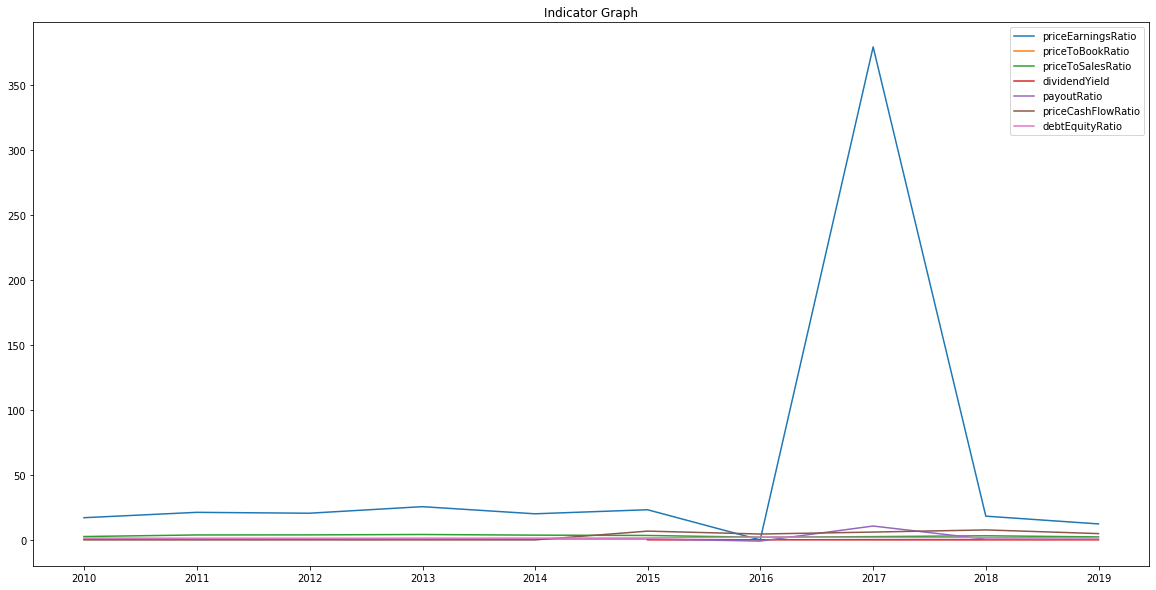

In [7]:
plt.figure(figsize=(20, 10))
plt.title('Indicator Graph')
for col in indicator_cols:
    plt.plot(df_stock['index'].astype('datetime64[ns]'), df_stock[col], label=col)
plt.legend()
plt.show()